# Qiskit Fall Fest 2023

![QFF Logo](images/QFF-logo.png)

## Challenge 6: Quantum teleportation

**Note:** Challenge 6는 Challenge 5에서 dynamic circuit에 대한 개념을 익히고 도전하시길 바랍니다.

## Part 1: Intro To Quantum Teleportation

이번 challenge에서는 Quantum teleporation에 대해서 다룰 예정입니다! 한국어로는 양자 원격전송이라고도 부릅니다. Quantum teleportation이란 무엇일까요? 이름만 들으면 양자역학을 이용하여 물체를 순간이동 시키는 방법을 지칭하는 단어 같지만 아쉽게도 그것은 아닙니다. Quantum teleporation이란 **양자 정보**(e.g. $\alpha |0\rangle + \beta |1\rangle$ 와 같은 qubit의 양자 상태)를 임의의 지점 A에서 B로 전달하는 것입니다.

잠시 다른 이야기를 해보겠습니다.

현재 우리는 전자기파를 사용하여 통신을 하고 있습니다. 이러한 통신을 통해 0 또는 1의 고전적인 정보를 주고 받고 있습니다. 채널(Channel)이란 송신기와 수신기 사이에 존재하는 가상의 장치입니다. 정보 신호를 전달해주는 통로인 것입니다. 이러한 채널들을 기반으로 빠른 속도로 0과 1의 정보를 주고 받을 수 있게 되면서 인터넷을 하고 다른 사람과 채팅을 할 수 있습니다. 이러한 0 또는 1의 고전적인 정보를 다루는 채널을 고전 채널이라고 하겠습니다.

양자 정보는 고전 정보와는 다릅니다. 양자 정보는 0과 1의 중첩이 가능하며, 서로 다른 입자끼리의 얽힘(entanglement)도 존재할 수 있습니다. 이러한 양자 정보는 기존의 고전 채널을 통해서 전달할 수 없습니다. 그럼 qubit의 양자 정보는 어떻게 전송할 수 있을까요?

먼저, qubit를 직접 A라는 위치에서 B라는 위치로 옮기는 방법이 있습니다. 하지만 대부분의 양자 상태는 외부 노이즈에 굉장히 취약하기 때문에 qubit의 양자 상태를 유지하며 먼 거리를 이동시키는 것은 어렵습니다.

Qubit 자체를 직접 이동시키지 않으면서 qubit의 양자 상태를 다른 qubit로 전송하는 방법에 대하여 1993년 Charles Bennett, Claude Crépeau, Richard Jozsa, Asher Peres, William Wootters이 제안한 방법이 있습니다. 이것이 바로 얽힘과 고전적인 통신을 사용하여 한 qubit에서 다른 qubit로 양자 정보를 전송하는 quantum teleportation 입니다.

이것이 어떻게 가능한지 quantum teleportation의 프로토콜을 자세히 살펴보겠습니다.

![Quantum-teleportation](images/quantum-teleportation.png)

이 프로토콜은 세 개의 qubits를 필요로 합니다. 

1. 전송하고자 하는 양자 정보를 가진 qubit : 위 그림에서는 qubit C
2. 얽혀 있는 qubit 쌍 중 송신자 족에 있는 한 qubit : 위 그림에서는 qubit A
3. 얽혀 있는 qubit 쌍 중 수신자 쪽에 있는 한 qubit : 위 그림에서는 qubit B

**목표는 qubit C의 양자 상태를 qubit B로 옮기는 것입니다.**

이번 challenge에서 구현할 Quantum teleportation의 과정은 다음과 같이 요약할 수 있습니다.

1. 벨 쌍(Bell pair) 4가지 중 $|\psi^{-}\rangle$ 상태로 얽힌 qubit A와 B를 만듭니다.
2. 보내고자하는 양자 정보가 담긴 qubit C를 qubit A와 함께 Bell basis 로 측정합니다.
3. 측정 결과에 따라 알맞은 gate를 qubit B에 가해줍니다. Dynamic circuit 개념이 쓰이는 것입니다.
4. qubit B의 양자 상태는 원래 qubit C의 양자 상태가 됩니다.

### Bell state란 무엇인가?

Bell state는 두 개의 qubits가 가장 강하게 얽혀있는(maximally entangled quantum states of two qubits) 4가지 양자 상태를 말합니다. 그 4가지 양자 상태는 다음과 같습니다.

- $|\psi^{+}\rangle = \frac{1}{\sqrt{2}}[|0\rangle|1\rangle + |1\rangle|0\rangle]$
- $|\psi^{-}\rangle = \frac{1}{\sqrt{2}}[|0\rangle|1\rangle - |1\rangle|0\rangle]$
- $|\phi^{+}\rangle = \frac{1}{\sqrt{2}}[|0\rangle|0\rangle + |1\rangle|1\rangle]$
- $|\phi^{-}\rangle = \frac{1}{\sqrt{2}}[|0\rangle|0\rangle - |1\rangle|1\rangle]$

이러한 Bell states는 서로 수직이고 4가지 states들끼리 선형 결합을 하면 2 qubit의 모든 양자 상태를 다 표현할 수 있기 때문에 basis로 사용하기 적절합니다. 그래서 Bell states를 Bell basis라고도 부릅니다.

지금까지 주로 사용했던 2qubits 시스템의 기저는 $|00\rangle,\,|01\rangle,\,|10\rangle,\,|11\rangle$ 입니다. 이것들을 computational basis라고도 부르는데 이것들을 Bell states로 표현하면 다음과 같습니다.

- $|01\rangle = \frac{1}{\sqrt{2}}[|\psi^{+}\rangle + |\psi^{-}\rangle]$
- $|10\rangle = \frac{1}{\sqrt{2}}[|\psi^{+}\rangle - |\psi^{-}\rangle]$
- $|00\rangle = \frac{1}{\sqrt{2}}[|\phi^{+}\rangle + |\phi^{-}\rangle]$
- $|11\rangle = \frac{1}{\sqrt{2}}[|\phi^{+}\rangle - |\phi^{-}\rangle]$

### Quantum Teleportation의 자세한 과정

위에서 본 그림을 다시 가져오고, 수식을 쭉 써나가면서 quantum teleportation이 구체적으로 어떻게 이루어지는지 설명드리겠습니다. Quantum Teleportation의 목표를 다시 한 번 알려드리자면, 한 입자의 양자 상태를 다른 입자로 옮기는 것입니다.

![Quantum-teleportation](images/quantum-teleportation.png)

- $|\Psi\rangle_{C} = \alpha|0\rangle_{C} + \beta|1\rangle_{C}$ : 전송하고자 하는 임의의 양자 상태

- $|\psi^{-}\rangle_{AB} = \frac{1}{\sqrt{2}}(|0\rangle_{A}|1\rangle_{B} - |1\rangle_{A}|0\rangle_{B})$ : 송신자 측과 수신자 측이 나누어 가진 bell state에 해당하는 얽힘 쌍

두 상태를 함께 수식 전개하여 qubit C와 qubit A를 bell state 기준으로 묶어주면 그 결과는 다음과 같이 나옵니다.

$$
\begin{aligned}
|\Psi\rangle_{C}|\psi^{-}\rangle_{AB} &= (\alpha|0\rangle_{C} + \beta|1\rangle_{C})(|0\rangle_{A}|1\rangle_{B} - |1\rangle_{A}|0\rangle_{B})/\sqrt{2}\\\\
&= [\alpha|0\rangle_{C}|0\rangle_{A}|1\rangle_{B}-\alpha|0\rangle_{C}|1\rangle_{A}|0\rangle_{B}\\
&\;+\beta|1\rangle_{C}|0\rangle_{A}|1\rangle_{B} - \beta|1\rangle_{C}|1\rangle_{A}|0\rangle_{B}] / \sqrt{2}\\\\
&= [\alpha(|\phi^{+}\rangle_{CA} + |\phi^{-}\rangle_{CA})|1\rangle_{B}-\alpha(|\psi^{+}\rangle_{CA} + |\psi^{-}\rangle_{CA})|0\rangle_{B}\\
&\;+\beta(|\psi^{+}\rangle_{CA} - |\psi^{-}\rangle_{CA})|1\rangle_{B} - \beta(|\phi^{+}\rangle_{CA} - |\phi^{-}\rangle_{CA})|0\rangle_{B}] / 2\\\\
&=[|\psi^{+}\rangle_{CA}(-\alpha|0\rangle_{B}+\beta|1\rangle_{B}) - |\psi^{-}\rangle_{CA}(\alpha|0\rangle_{B}+\beta|1\rangle_{B})\\
&\;\,+|\phi^{+}\rangle_{CA}(\;\;\;\alpha|1\rangle_{B}-\beta|0\rangle_{B}) + |\phi^{-}\rangle_{CA}(\alpha|1\rangle_{B}+\beta|0\rangle_{B})] / 2
\end{aligned}
$$

qubit C와 qubit A를 Bell basis로 측정합니다. Bell basis로 측정을 한다는 것은 qubit C와 qubit A의 관측결과가 $|00\rangle,\,|01\rangle,\,|10\rangle,\,|11\rangle$과 같은 computational basis가 아니라, Bell states 중의 하나로 나오도록 측정을 한다는 것입니다.

각각의 측정 결과에 따른 수신자 측 qubit B의 상태는 다음과 같습니다.

|qubit C와 A를 bell basis로 관측한 결과|이에 따른 qubit B의 상태|
|:---:|:---:|
|$\vert\psi^{-}\rangle_{CA}$|$\alpha\vert0\rangle_{B}+\beta\vert1\rangle_{B}$|
|$\vert\phi^{-}\rangle_{CA}$|$\alpha\vert1\rangle_{B}+\beta\vert0\rangle_{B}$|
|$\vert\psi^{+}\rangle_{CA}$|$\alpha\vert0\rangle_{B}-\beta\vert1\rangle_{B}$|
|$\vert\phi^{+}\rangle_{CA}$|$\alpha\vert1\rangle_{B}-\beta\vert0\rangle_{B}$|

qubit C와 qubit A를 bell basis로 관측한 결과가 $|\psi^{-}\rangle_{CA}$ 일 때, qubit B의 상태는 quantum teleportation 과정을 거치기 전 qubit C의 상태인 $\alpha|0\rangle_{B}+\beta|1\rangle_{B}$ 와 똑같이 나옵니다.

이 때 qubit C와 qubit A를 bell basis로 관측했을 때 각각의 bell state가 나올 확률은 4가지 모두 1/4 입니다. 그러면 qubit C와 qubit A의 관측 결과가 $|\psi^{-}\rangle_{CA}$가 아닌 경우, quantum teleportation하는 것에 실패한 것일까요?

**실패한 것이 아닙니다.** qubit C와 qubit A가 다른 bell state로 측정이 되더라도 그 측정 결과를 알면 qubit B에 적절한 gate를 가해주어 $\alpha|0\rangle_{B}+\beta|1\rangle_{B}$로 만들어 줄 수 있습니다. 다음의 표를 보시길 바랍니다.

|qubit C와 A를 bell basis로 관측한 결과|이에 따른 qubit B의 상태|qubit B에 가해야 하는 gate|
|:---:|:---:|:---:|
|$\vert\psi^{-}\rangle_{CA}$|$\alpha\vert0\rangle_{B}+\beta\vert1\rangle_{B}$|$I$(identity)|
|$\vert\phi^{-}\rangle_{CA}$|$\alpha\vert1\rangle_{B}+\beta\vert0\rangle_{B}$|$X$(Pauli X)|
|$\vert\psi^{+}\rangle_{CA}$|$\alpha\vert0\rangle_{B}-\beta\vert1\rangle_{B}$|$Z$(Pauli Z)|
|$\vert\phi^{+}\rangle_{CA}$|$\alpha\vert1\rangle_{B}-\beta\vert0\rangle_{B}$|$ZX$(X gate 다음에 Z gate)|

## Part 2: Make Bell State

이제 Quantum Teleportation을 수행하는 양자회로를 만들겠습니다! 아래의 코드 셀에서 필요한 패키지들을 import 하겠습니다.

In [1]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, qasm3
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector, Statevector
from qiskit_aer import AerSimulator

우선 3개의 qubits와 2개의 classical bits가 있는 양자회로를 만들어야 합니다. 이를 만족하는 "base"양자 회로를 만들어 드리겠습니다.

In [2]:
qubit_C = QuantumRegister(1, name="qubit C")
qubit_A = QuantumRegister(1, name="qubit A")
qubit_B = QuantumRegister(1, name="qubit B")

mC = ClassicalRegister(1, name="mC")
mA = ClassicalRegister(1, name="mA")

base = QuantumCircuit(qubit_C, qubit_A, qubit_B, mC, mA)

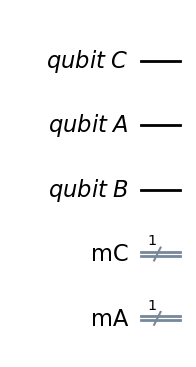

In [3]:
base.draw("mpl")

### 문제 1

가장 먼저 필요한 것은 qubit A와 B를 bell state 중에 $|\psi^{-}\rangle_{AB}$로 만드는 것입니다. 이것을 만드는 함수를 구성하라는 것이 이번 문제입니다. 그 전에, 참고하시라고 $|\phi^{+}\rangle_{AB} = \frac{1}{\sqrt{2}}[|0\rangle_{A}|0\rangle_{B} + |1\rangle_{A}|1\rangle_{B}]$를 만드는 양자 회로 그림을 보여 드리겠습니다.

<img src="images/challenge6_circuit1.png" width="30%">

이제 qubit A와 B를 bell state 중에 $|\psi^{-}\rangle_{AB}$로 만드는 함수를 작성하셔야 합니다. 아래의 코드 셀에서 QuantumCircuit의 두번째 qubit과 세번째 qubit 사이에 $|\psi^{-}\rangle_{AB} = \frac{1}{\sqrt{2}}[|0\rangle_{A}|1\rangle_{B} - |1\rangle_{A}|0\rangle_{B}$상태의 얽힘을 만드는 함수를 `create_bell_pair` 함수라고 합시다.

아래의 코드 셀에서 그 함수를 작성해 주시길 바랍니다.

_Hint1: X gate, hadamard gate, CNOT gate 3가지 종류의 gate 만으로 구현 가능합니다._

_Hint2: CNOT gate는 QuantumCircuit의 `.cx()` 매서드를 이용하여 구현 가능합니다._

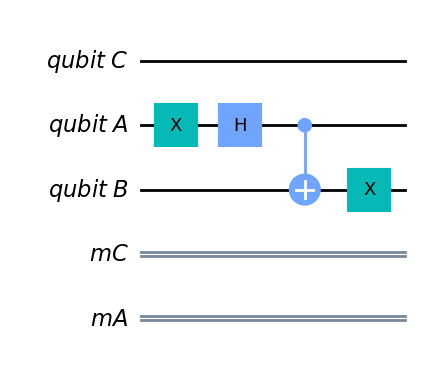

In [7]:
def create_bell_pair(
    circuit: QuantumCircuit,
    mC: QuantumRegister,
    mA: QuantumRegister
) -> None:
    
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    
    circuit.x(1)
    circuit.h(1)
    circuit.cx(1,2)
    circuit.x(2)

    ## Do not change the code below this line ##
    
qc = base.copy_empty_like()
create_bell_pair(qc, mC, mA)
answer1 = qc
qc.draw('mpl', cregbundle=False)

In [11]:
# Grader Cell: Run this to submit your answer

from qff_ku_grader.challenges.qff_ku2023 import grade_challenge6a

grade_challenge6a(answer1)


Congratulations 🎉! Your answer is correct.


## Part 2: Measurement in Bell basis

Qiskit에서는 측정은 모두 $|0\rangle$과 $|1\rangle$을 basis로 하는(=computational basis = canonical basis) 측정을 합니다. 하지만 quantum teleportation을 하기 위해서는 bell basis 측정을 해야합니다. 이러한 basis를 바꾸어 주는 작업을 해주어야 합니다.

아래의 그림과 같은 회로를 살펴보겠습니다.

<img src="images/challenge6_circuit2.png" width="50%">

4가지 bell states는 이 양자 회로를 거치면 $|00\rangle,\, |01\rangle,\, |10\rangle,\, |11\rangle$와 같은 computational basis 상태로 바뀌게 됩니다. 각각의 bell state가 어떠한 상태로 바뀌는지 다음 표에 적어두었습니다. 왜 이렇게 되는지 직접 계산해보시길 바랍니다.

|기존 양자 상태|바뀐 양자 상태|
|:---:|:---:|
|$\vert\psi^{-}\rangle_{CA}$|$\vert11\rangle$|
|$\vert\phi^{-}\rangle_{CA}$|$\vert10\rangle$|
|$\vert\psi^{+}\rangle_{CA}$|$\vert01\rangle$|
|$\vert\phi^{+}\rangle_{CA}$|$\vert00\rangle$|

### 문제 2

함수 `change_basis`는 위의 그림에서 본 Bell states를 $|00\rangle,\, |01\rangle,\, |10\rangle,\, |11\rangle$와 같은 상태로 바꾸어주는 gate를 양자 회로에 추가하고, 그 이후 `qubit C`를 측정하여 그 값을 classical bit `mC`에 저장하고 `qubit A`를 측정하여 그 값을 classical bit `mA`에 저장하는 함수입니다.

이 회로를 아래의 코드 셀에서 작성하세요.

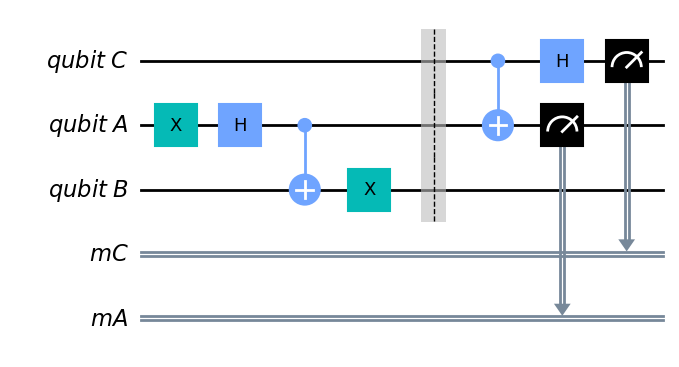

In [12]:
def change_basis(
    circuit: QuantumCircuit,
    mC: QuantumRegister,
    mA: QuantumRegister
) -> None:
    
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    
    circuit.cx(0,1)
    circuit.h(0)
    circuit.measure([0,1],[0,1])
    
    ## Do not change the code below this line ##

qc = base.copy_empty_like()
create_bell_pair(qc, mC, mA)
qc.barrier()
change_basis(qc, mC, mA)
qc.draw('mpl', cregbundle=False)

In [13]:
answer2 = base.copy_empty_like()
change_basis(answer2, mC, mA)

# Grader Cell: Run this to submit your answer

from qff_ku_grader.challenges.qff_ku2023 import grade_challenge6b

grade_challenge6b(answer2)


Congratulations 🎉! Your answer is correct.


## Part 3: Dynamic circuit in Quantum Teleportation

여러분은 보내고자 하는 양자 상태가 담긴 qubit_C와 얽힘 쌍 중 송신자 측에 있는 qubit인 qubit_A를 Bell basis로 측정까지 하였습니다. 이러한 측정값은 2 bits의 고전적인 값입니다. 이러한 값을 수신자 측에게 고전 채널을 통해 전송했다고 합시다. 그럼 수신자 측은 이제 Bell basis로 측정한 결과값을 알게 됩니다.

이제 수신자가 전달 받은 측정 값을 기반으로 본인이 갖고 있는 qubit_B에 적절한 gate를 가할 차례입니다. 이 내용을 아래의 표로 정리하겠습니다.

|C와 A의 bell state|basis 변경 및 측정 결과|이에 따른 qubit B의 상태|qubit B에 가해야 하는 gate|
|:---:|:---:|:---:|:---:|
|$\vert\psi^{-}\rangle_{CA}$|$\vert11\rangle_{CA}$|$\alpha\vert0\rangle_{B}+\beta\vert1\rangle_{B}$|$I$(identity)|
|$\vert\phi^{-}\rangle_{CA}$|$\vert10\rangle_{CA}$|$\alpha\vert1\rangle_{B}+\beta\vert0\rangle_{B}$|$X$(Pauli X)|
|$\vert\psi^{+}\rangle_{CA}$|$\vert01\rangle_{CA}$|$\alpha\vert0\rangle_{B}-\beta\vert1\rangle_{B}$|$Z$(Pauli Z)|
|$\vert\phi^{+}\rangle_{CA}$|$\vert00\rangle_{CA}$|$\alpha\vert1\rangle_{B}-\beta\vert0\rangle_{B}$|$ZX$(X gate 다음에 Z gate)|

### 문제 3

`receiver` 함수는 다음과 같은 과정을 통해, 측정 값에 따라 qubit_B에 적절한 gate를 가하는 함수 입니다.

1. qubit_A의 측정 값이 0 인 경우 qubit_B에 $X$ gate를 가합니다. `if_test()`문을 사용하면 됩니다.
2. qubit_C의 측정 값이 0 인 경우 qubit_B에 $Z$ gate를 가합니다. `if_test()`문을 사용하면 됩니다.

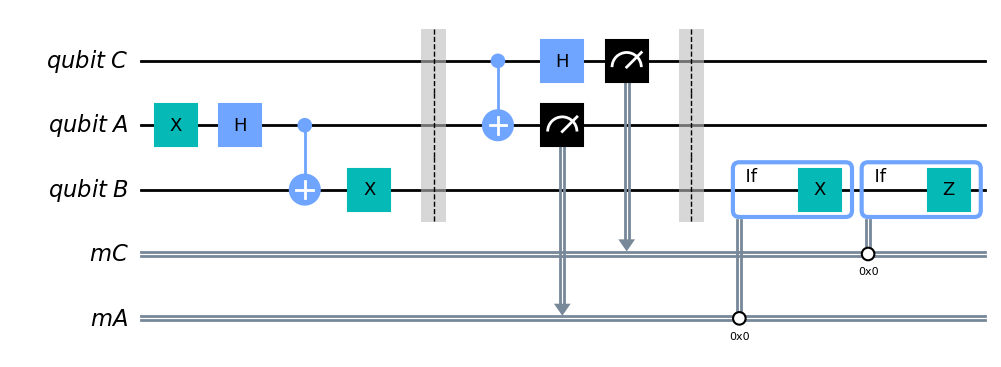

In [15]:
def receiver(
    circuit: QuantumCircuit,
    mC: QuantumRegister,
    mA: QuantumRegister
) -> None:
    
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    
    with circuit.if_test((mA, 0)):
        circuit.x(2)
    with circuit.if_test((mC, 0)):
        circuit.z(2)
    
    ## Do not change the code below this line ##
    
qc = base.copy_empty_like()
create_bell_pair(qc, mC, mA)
qc.barrier()
change_basis(qc, mC, mA)
qc.barrier()
receiver(qc, mC, mA)
qc.draw('mpl', cregbundle=False)

In [17]:
answer3 = base.copy_empty_like()
receiver(answer3, mC, mA)


# Grader Cell: Run this to submit your answer

from qff_ku_grader.challenges.qff_ku2023 import grade_challenge6c

grade_challenge6c(answer3)


Congratulations 🎉! Your answer is correct.


## Part 4: Simulating the Teleportation Protocol

Quantum Teleportation 과정을 양자 회로로 완성하였습니다! 잘 동작하는지 확인해 볼까요?

먼저 qubit C를 임의의 양자 상태로 초기화 하겠습니다. Qiskit의 `random_statevector()` 함수를 이용하면 임의의 양자 상태를 쉽게 만들 수 있습니다.

<IPython.core.display.Latex object>

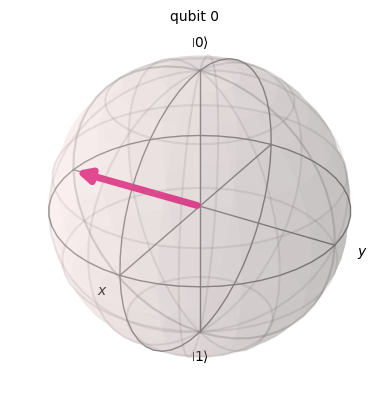

In [10]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle = "))

# Show it on a Bloch sphere
plot_bloch_multivector(psi)

Qiskit의 `initialize` 함수를 이용하여 특정 상태로 초기화 시키는 gate를 생성할 수 있습니다. 이 gate는 가역적이지 않으므로 unitary 연산이 아닙니다.

In [11]:
init_gate = Initialize(psi)
init_gate.label = "init"

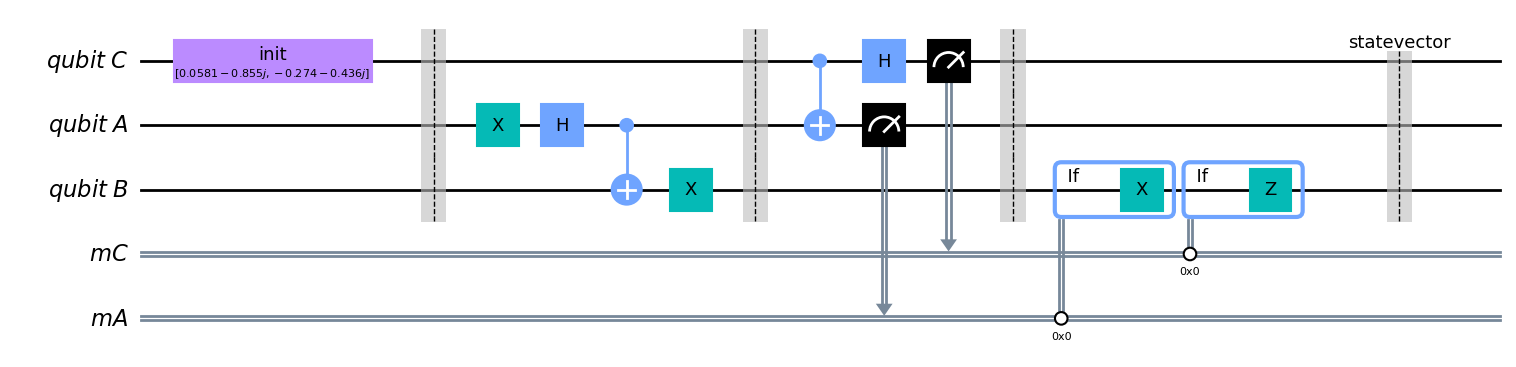

In [12]:
# Create full quantum teleportation circuit

qc = base.copy_empty_like()

# Initialize qubit_C to random quantum state
qc.append(init_gate, [0])
qc.barrier()

# Create bell pair between qubit_A and qubit_B
create_bell_pair(qc, mC, mA)
qc.barrier()

# Measure qubit_C and aubit_A in Bell basis
change_basis(qc, mC, mA)
qc.barrier()

# Feedforward
receiver(qc, mC, mA)

# Save Statevector of Quantum Circuit
qc.save_statevector()
qc.draw('mpl', cregbundle=False)

이제 측정 결과를 보겠습니다. 아래의 코드 셀을 실행 시키면 3개의 Bloch sphere 그림이 나올 것입니다. 가장 왼쪽에 있는 것은 최종적인 qubit_C의 양자 상태, 가운데 있는 것은 최종적인 qubit_A의 양자 상태, 오른쪽에 있는 것은 qubit_B의 양자 상태입니다.

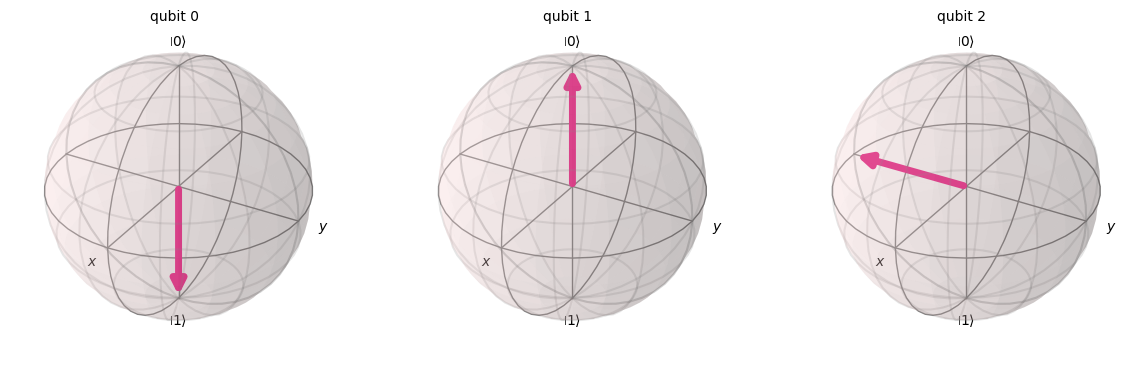

In [13]:
sim = Aer.get_backend('aer_simulator')
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

마지막 bloch sphere를 보시길 바랍니다. Part 4에서 처음 실행했던 코드 셀에서 생성한 random statevector가 qubit_B로 그대로 옮겨진 것을 확인할 수 있습니다.

이 때, 최종적인 qubit_C의 양자 상태를 보시길 바랍니다. 원래 random statevector를 가졌던 qubit_C 이지만, 측정 과정이 있었기에 $|0\rangle$ 혹은 $|1\rangle로 붕괴되었습니다. 즉 원래 양자 정보를 갖고 있던 qubit_C는 더이상 정보를 갖고 있지 못하는 것입니다.

즉, qubit_C의 임의의 양자 상태를 qubit_B로 옮기면서 qubit_C는 기존의 양자 상태를 잃게 됩니다. qubit_C의 양자 상태를 보존하면서 qubit_B로 그 양자 상태를 옮기는 방법은 없을까요? 마치 복사-붙여넣기 과정처럼요! 아쉽게도 이것은 불가능하다는 것이 증명되었습니다. 이것을 [No Cloning Theorem](https://en.wikipedia.org/wiki/No-cloning_theorem)이라고 부릅니다. 관심 있으신 분은 링크를 클릭하여 내용을 살펴보시길 바랍니다.

## 축하합니다!

이제 여러분은 양자 원격전송을 할 수 있게 되었습니다! 수고 많으셨습니다:)